# Import Necessary Packages

In [1]:
import pandas as pd
from collections import Counter
import re

# Word Cloud Functions

These are the old functions copied from the repo.

In [2]:
def count_syllables(word):
    word = word.lower()
    syllable_count = 0
    vowels = 'aeiouy'
    if len(word) == 0:
        return 0
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count = 1
    return syllable_count
    

def clean_text(story):
    # remove weird characters
    whitelist = set("abcdefghijklmnopqrstuvwxyz' ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    story = ''.join(filter(whitelist.__contains__, story))

    # tokenize words
    story = story.split()

    # remove '' from list
    story = [x for x in story if x != '']

    return story


def complexity_df(story_words):

    # Create a dictionary to count occurences of words
    word_counts = Counter(story_words)

    # Convert the dictionary to a dataframe
    word_list = []
    count_list = []

    for k, v in word_counts.items():
        word_list.append(k)
        count_list.append(v)

    words = pd.DataFrame({'word': word_list, 'count': count_list})

    # make a column for letter counts
    words['len'] = words['word'].apply(len)

    # column for syllable count
    words['syllables'] = words['word'].apply(count_syllables)
    # https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4

    # make a column for how BIG a word is
    words['complexity'] = words['syllables'] + words['len']

    return words

These I wrote to see the top ten and bottom ten.

In [3]:
def get_top_complex_words(words_df, num_of_words):
  words_df = words_df.sort_values(by=['complexity'], ascending=False)
  most_complex = words_df[:num_of_words]
  return most_complex

In [4]:
def get_ten_least_complex_words(words):
  words = words.sort_values(by=['complexity'], ascending=True)
  least_complex = words[:10]
  return least_complex

First rewrite of the complexity_df function.

In [5]:
# Rewriting complexity_df function

def complexity_df(story_words):

    # Create a dictionary to count occurences of words
    word_counts = Counter(story_words)

    # Convert the dictionary to a dataframe
    word_list = []
    count_list = []

    for k, v in word_counts.items():
        word_list.append(k)
        count_list.append(v)

    words = pd.DataFrame({'word': word_list, 'count': count_list})

    # make a column for letter counts
    words['len'] = words['word'].apply(len)

    # column for syllable count
    words['syllables'] = words['word'].apply(count_syllables)
    # https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4

    # make a column for how complex a word is

    # first setting words that are in the complex_words with their set complexity
    # these are words at higher grade levels, that don't work with the complexity metric
    vdic = pd.Series(complex_words.complexity.values, index=complex_words.word).to_dict()
    words.loc[words.word.isin(vdic.keys()), 'complexity'] = words.loc[words.word.isin(vdic.keys()), 'word'].map(vdic)

    # then filling in the rest with the complexity metric
    words['complexity'] = words['complexity'].fillna(words['syllables'] + words['len'])
    words = words.astype({"complexity": int})

    return words

Second rewrite of the complexity_dataframe function.

In [6]:
def complexity_dataframe(story_string, num_of_words_needed=20):

    # Counts the syllables in each word
    def count_syllables(word):
      word = word.lower()
      syllable_count = 0
      vowels = 'aeiouy'
      if len(word) == 0:
          return 0
      if word[0] in vowels:
          syllable_count += 1
      for index in range(1, len(word)):
          if word[index] in vowels and word[index - 1] not in vowels:
              syllable_count += 1
      if word.endswith('e'):
          syllable_count -= 1
      if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
          syllable_count += 1
      if syllable_count == 0:
          syllable_count = 1
      return syllable_count

    # Cleans data to be usable for the dataframe
    cleaned = re.sub("[^-9A-Za-z ]", "" , story_string).lower()
    cleaned_words = cleaned.split()

    # Counts how many times each word appears in the story
    word_counts = Counter(cleaned_words)

    # Convert the dictionary to a dataframe
    word_list = []
    count_list = []

    for k, v in word_counts.items():
        word_list.append(k)
        count_list.append(v)

    words = pd.DataFrame({'word': word_list, 'count': count_list})

    # make a column for letter counts
    words['len'] = words['word'].apply(len)

    # column for syllable count
    words['syllables'] = words['word'].apply(count_syllables)
    # https://medium.com/@mholtzscher/programmatically-counting-syllables-ca760435fab4

    # make a column for how complex a word is

    # first setting words that are in the complex_words with their set complexity
    # these are words at higher grade levels, that don't work with the complexity metric
    vdic = pd.Series(complex_words.complexity.values, index=complex_words.word).to_dict()
    words.loc[words.word.isin(vdic.keys()), 'complexity'] = words.loc[words.word.isin(vdic.keys()), 'word'].map(vdic)

    # then filling in the rest with the complexity metric
    words['complexity'] = words['complexity'].fillna(words['syllables'] + words['len'])
    words = words.astype({"complexity": int})

    # Dividing the complexity by how many times the word appears in the story 
    words['complexity'] = words['complexity'] / words['count']
    words = words.sort_values(by=['complexity'], ascending=False)

    # Returns the words df columns 'word' and 'complexity' and rows up to how many are selected (default=20)
    return words[['word', 'complexity']][:num_of_words_needed]

    # Returns just the word column up to the selected number as a list, possible use later
    # return words['word'][:num_of_words_needed].tolist()

In [7]:
def story_word_count(story_string):
    # cleans the story string
    cleaned = re.sub("[^-9A-Za-z ]", "", story_string).lower()
    # counts the words in the story
    cleaned_words_count = len(cleaned.split())
    return cleaned_words_count

# Testing First Rewrite of Complexity Function

Super words are taken from the complex_words.csv. Located in data/crop-cloud

In [8]:
super_words = "aback, abaft, abalone, abamp, abampere, abase, abased, abash, abashed, abasia, abate, abatis, abaxial, abbacy, abbess, abbot, abduce, abduct, abducent, abductee, abductor, abele, abelmosk, abet, abettor, abeyance, abeyant, abhor, abject, abhorrent, abjure, abide, abiosis, abient, ablate, ablaze, abnegate, abode, abrade, abridge, abrogate, abrupt, abscind, absolve, absorb, abscond, abstain, abstruse, absurd, abyss, acarid, accede, acclivity, accolade, accord, accost, accosted, accredit, accroach, accrue, acumen, admonish, adumbrate, aggrandize, alacrity, anathema, annex, arboreal, arrogate, ascetic, bane, bashful, beguile, bilk, cajole, calumny, carouse, cavort, clamor, cleave, cobbler, cogent, conduit, congruity, connive, consign, contusion, contrite, covet, cupidity, crass, dearth, debacle, debauch, debunk, defunct, despot, didactic, dirge, discomfit, dispel, disrepute, dogmatic, dour, duplicity, edict, elegy, elicit, emend, emollient, enervate, enfranchise, ephemeral, equivocal, espouse, evince, exhort, execrable, exigent, expiate, expunge, extol, extant, expurgate, fallacious, fatuous, fetter, flagrant, foiled, foil, fortuitous, fractious, garrulous, gourmand, gratuitous, hapless, iconoclast, impinge, impute, inane, inchoate, inimical, inoculate, instigate, inure, invective, knell, licentious, linchpin, litigant, maelstrom, maudlin, maverick, mawkish, modicum, morass, mores, nadir, neophyte, noisome, obdurate, officious, ostracism, palliate, panacea, pariah, paucity, pejorative, pellucid, penurious, pert, pernicious, phlegmatic, pithy, platitude, plaudit, plenitude, portent, potentate, presage, probity, proclivity, profligate, proscribe, protean, prurient, puerile, quaint, quixotic, quandary, relegate, remiss, reprieve, reprobate, rife, sanguine, scurrilous, sobriety, solicitous, solipsism, staid, stolid, subjugate, surfeit, swarthy, tome, toady, torpid, travesty, trenchant, trite, truculent, turpitude, umbrage, upbraid, veracity, vestige, vilify, vitriolic, winsome, yoke, zephyr, wily, tirade, grommet, nauseant, addend, tutor, clout, sultry, fipple, accursed, accuser,  accustom, acedia, acerbic, acerbate, acerbity, acerose, acerous, acetic, acetous, achene, acicular, aciculate, aciniform, acme, acolyte, acquiesce, acquit, acrid, acrostic, acta, adage, addle, adduce, adit, adjoin, adjure, adulate, aegis, aerate, affix, aft, agog, airfoil, akin, alcove, alibi, allay, allude, alms, ambit, amble, amid, amity, amuck, ana, ancon, anent, animus, antic, aphid, apiary, appall, aptly, arete, argot, asp, atone, aura, avid, avow, awe, awry, balk, bask, bawl, bemoan, bequeath, berate, bide, biome, boor, brash, brawl, brute, bungle, butte, bygone, callow, captor, careen, cask, chaff, chard, chasm, chic, chide, chock, chortle, chroma, clad, coax, cohere, collude, comity, conjoin, conk, contort, contuse, coup, cower, cowl, coy, crag, curt, couth, cyborg, dactyl, daft, dais, dally, dap, decoct, decry, deft, deify, delude, dire, divvy, doff, doily, dote, drab, drawl, droll, duly, dupe, dyad, ebb, edify, effigy, eke, elate, elude, embroil, eon, ergo, espy, eve, exude, exult, feign, fickle, flak, flay, fleck, flub, flux, forgo, frill, furl, garish, gauche, ghee, gnash, gnaw, goad, gouge, gruff, guck, gyre, gyro, heed, heft, helm, hew, hex, hind, hoax, hovel, hubris, hue, husk, illude, imbue, inapt, ingot, iota, ire, irk, jeer, jibe, jinx, jive, jolt, jot, jowl, keen, kiln, knave, knoll, lank, laud, lave, lax, laze, leer, leery, lest, liquefy, lithe, loath, lob, lop, lug, lunge, lurk, lush, maim, malady, maraud, maw, meek, mewl, miff, moot, mope, morsel, mull, naught, nook, obtuse, ode, ombre, omit, opus, perplex, pilfer, placid, plait, pleat, poise, posy, pout, preen, primp, privy, prod, profuse, prone, pry, puny, putrid, pylon, pyre, qualm, quash, quell, quip, quirk, rancor, rapt, rasp, rebuff, recant, redact, reek, reel, reform, refract, reify, relent, rend, repute, resile, revile, riff, rile, romp, rout, ruse, sate, scant, schlep, scoff, scowl, sect, seep, seethe, shard, sheen, shirk, shunt, sidle, sigil, silt, sinew, singe, skew, skirr, skulk, slat, sleuth, slosh, sly, smelt, smirk, snafu, snare, sneer, snide, snub, sod, soiree, somber, sop, souse, spew, spiel, spire, splay, spry, squall, stasis, stern, ​​stifle, stint, stoke, stout, stow, strut, suave, subtle, sunder, supine, surly, swath, swathe, sync, tacit, tact, tatter, taut, teem, tepid, tether, thwart, toil, topple, tousle, trawl, trice, trifle, trill, trope, tuft, unapt, usury, valor, vapid, vat, verve, vex, vie, vigor, vivid, vouch, vying, waft, wane, wary, weary, welt, whim, whirl, wield, wile, wiry, woe, writhe, yowl, zeal"

The old clean text function prepares the data to be run through the complexity_df function.

In [9]:
super_words_cleaned = clean_text(super_words)

Import the complex_words.csv from the git repo to use in the complexity df. The function checks if any of the words in the story match the words in the list. If there is/are, the complexity score for that word/words is taken from the complex_words.csv.

In [10]:
complex_words = pd.read_csv("https://raw.githubusercontent.com/Lambda-School-Labs/scribble-stadium-ds/main/data/crop-cloud/complex_words.csv")

Creating the dataframe and sorting the columns by complexity.

In [11]:
super_words_df = complexity_df(super_words_cleaned)
super_words_df = super_words_df.sort_values(by=['complexity'], ascending=False)

In [12]:
super_words_df

,word,count,len,syllables,complexity
352,doily,1,5,2,20
237,acerbity,1,8,4,20
113,equivocal,1,9,4,20
111,enfranchise,1,11,3,20
243,acicular,1,8,4,20
...,...,...,...,...,...
339,dactyl,1,6,2,8
318,chide,1,5,1,6
433,loath,1,5,1,6
399,hind,1,4,1,5


Checking that the complexity metrics worked. All the words are "super words" so they should have a complexity score of 14, 16, 18, or 20.

In [13]:
super_words_df['complexity'].value_counts()

16    236
18    143
14    114
20    105
6       2
5       2
9       1
8       1
Name: complexity, dtype: int64

Checking the count is correct as well.

In [14]:
story_word_count(super_words)

604

Scribble story samples

In [15]:
scribble_story = "Once apon a time there was a girl named Mary. On a warm sunny day Mary was walking through the woods near hear nouse to look for some critters to take pictures of. She loved animals and nature all her life even though she was only nine years oldShe thinks that she is going to die soon. She does go to school but she isn't that smart. For example Mary recycled a pie even though the pie was not even bitten. Another thing she did was leave her muffin in the woods while she was traveling with  her family to Andrea's house which is one of Mary's friends atschool and Mary's muffin was eaten by a bear that sniffed it :q!:from far away. Yes. Mary could be a little weird but that is just how she is. Back to the real story now. Mary found a fox, took a picture she also found a rabbit took a picture she found a squirrel and took a picture before it ran away. But sooner or later she saw two eyes peeking through a bush on the side of the path she was walking on. Then the creature slowly came out of the bush. It was a bear. The bear growled at Mary. Mary was terrifyed. She started running and running but she could still see the bear growling behind her. This was the end of Mary. Mary was approaching her house she could see it now. She was safe in her house. She was now really scared. She could possibly be eaten but she made it to the door opened it and slammed it shut before the bear could get in. She ran or sprinted rather up to her room. Im alive!! She cried. I just cant belive it Im alive!! Mary was so relifed she told her mom and dad and her brother. And that night Mary was kissed goodnight and tucked into bed. And that is the only brave time of her life."

In [16]:
scribble_story_2 = " The secret fifth gradeI am Amelia I am starting fifth grade.I have a little siter named Emma, Emma isgoining into kindergarden, with her tripletsAva and Isabella, but I don't careabout them. When I was a 3rd graderwe learned how to invent. This year I will try to make an invention that a robot will go to school for me. Got to go to sleep. zzzzzz. I wake up get changed, brush teeth, and do hair. I have long curly brown hair. I used to wear glasses and braces, and oncebroke my leg. I am 10, I will turn 11 in November. The school is called Los Angeles elementry school. I live in Nevada and will drive there. It is probabaly an hour. When I walked in Mrs. Begula said Hello! Mrs. Klapeia, my last name. I said hi. I have to share a desk with Brittney. My schedule: Math Writting, reading, vocab, spelling, typing, and social studies. It had said NO Lunch In Fifth grade! When I was in second grade Kayla calle me a division Decimal. I did not like it. We had to make division problems and they were all with decimals. Class dismissed said Mrs. Begula. Now I was not a witch, vampire, or godess, but I made a sock from Emma and made it do my homework. When it was time to go I didn't I made a blue robot the whole night. Blue is my favorite color, but it only had a blue shirt because my teacher would notice it is not me. I sent it out with my mom. I went on my phone, until Ava came in my room. She said loudly Why are you not at school! Good thing she did not notice. I had to say something um I am sick. Cof cof cof. Oh I see let me tell Isabella. Isabella I heard she said. No said Ava. Should I tell Mom if she's really sick. Um no said Isabella play with me. Isabella already new about it. It the robot came back. It worked yay, and that is my year of fifth grade, When the home work is home. You are are doing my homework!"

In [17]:
scribble_story_3 = "Once apon a time there was a girl named Mary. On a warm Sunny day Mary was wealking through the woods near her house to look for some critters to take pictures of She loved animals and nature all her life even though she was only nine years old She thinks that she is going to die soon, she does go to school but she isnt that smart, for example Mary recycled a pie even though the pie was not even bitten. Another thing she did Was leave her muffin in the woods while she was traveling with her family to Andreas house which is one of Marys friends at school and Marys muffin was eaten by a bear that sniffer it from far away. Yes, Mary could be a little Weird but that is tust how she is. Back to the real story nowo Mary found a fox, took a picture she also found a rabbit took a picture She found a squirrel and took a picture before it ran away, But sooner or later she saw the eyes peeking through a bush on the site of the path she was walking on. Then the creature slowly came out of the bush. It was a bear. The bear grabled at Mary, Mary was terrifyed, she started running and running but she could still see the bear growling behind her. This was the and of Mary, Mary was approaching her have she could see it now, she was sate in her house, She was now really scared. She could possibly be eaten but she made it to the door opened it and slammed it shut before the bear could get in, she ran or sprinted rather up to her room. Im alive!!! she cried, I just cant belive it Im alive!!! Mary was so relifed she told her mom and dad and her brother. And that night Mary was kissed good night and thaked into bed. And that is the only brave time of her life. The secret fifth grade - 3102 E am Abeilia I am starting fifth grade I have alittle ster named Emma, Emma is goining into kindergarden, wi theer triplets Aver and Isabella, but I dont care about them when I was a 3rd grader leamed bow to invento This year I will try to make an invention that arobot Wil go to school forme. Got to go to deep. Ezzzzz. I wake up get changed, brush teeth, and do hair have long curly brown hair. I used to wear glasses and braces, and once broke my leg. I am 10, I will turn il in November The school is called Los Angeles elementry school, I live in Nevada and will drive there. It is probably an hour When I walked in Mrs. Begula said Hello Mrsklape, my last name I said his I have to share a desk with Brittney typing, and social stadies. It had said No My Schedule Math wetting reading, Vocabie spelling. Lunch In, Fifth grade When I was in second grade Kayla called me a division Decimal. I did not like it. we had to make division problems and they were all with iecimals Class dismissed said Mrs. Begular Now I was not a witch wampice, or godess, but I made asock from Emana and made it do my homework. When it was time to go 3102 I didnt I made a blue robet the whole night Blue is my favorite color but it only had a blue shirt because my teacher would hotice it is not me, I sent it out with Came in my room She said bond mayoneem. Prventions are phone on this Ava Why are you not at school. Good thing She did not notice. I had to say something un I am sick of of cof, oht see let me tell Isabella Isabella I heard she said. Mo suid Ava. Should I tell mom it shes really sick um no raid Isabella play with me. Isabella already new about it. It the robot came back It worker yay, and that is my year of fifth grade. When the home work is home you are doing my home werkt"

Cleaning the stories

In [18]:
scribble_story_clean = clean_text(scribble_story)
scribble_story_df = complexity_df(scribble_story_clean)

In [19]:
scribble_story_2_clean = clean_text(scribble_story_2)
scribble_story_2_df = complexity_df(scribble_story_2_clean)

In [20]:
scribble_story_3_clean = clean_text(scribble_story_3)
scribble_story_3_df = complexity_df(scribble_story_3_clean)

Top ten complex words in each story

In [21]:
top_ten_scribble_story = get_top_complex_words(scribble_story_df, 10)
top_ten_scribble_story

,word,count,len,syllables,complexity
136,approaching,1,11,3,14
68,traveling,1,9,3,12
127,terrifyed,1,9,3,12
140,possibly,1,8,3,11
166,goodnight,1,9,2,11
26,pictures,1,8,3,11
57,recycled,1,8,3,11
103,squirrel,1,8,2,10
71,Andrea's,1,8,2,10
119,creature,1,8,2,10


In [22]:
top_ten_scribble_story_2 = get_top_complex_words(scribble_story_2_df, 10)
top_ten_scribble_story_2

,word,count,len,syllables,complexity
16,kindergarden,1,12,4,16
19,tripletsAva,1,11,4,15
81,probabaly,1,9,4,13
75,elementry,1,9,4,13
14,isgoining,1,9,3,12
40,invention,1,9,3,12
127,dismissed,1,9,3,12
24,careabout,1,9,3,12
21,Isabella,5,8,4,12
172,something,1,9,3,12


In [23]:
top_ten_scribble_story_3 = get_top_complex_words(scribble_story_3_df, 10)
top_ten_scribble_story_3

,word,count,len,syllables,complexity
181,kindergarden,1,12,4,16
135,sate,1,4,1,16
132,approaching,1,11,3,14
232,elementry,1,9,4,13
313,something,1,9,3,12
186,Isabella,5,8,4,12
278,dismissed,1,9,3,12
303,Prventions,1,10,2,12
202,invention,1,9,3,12
124,terrifyed,1,9,3,12


Ten least complex words in each story

In [24]:
ten_least_scribble_story = get_ten_least_complex_words(scribble_story_df)
ten_least_scribble_story

,word,count,len,syllables,complexity
2,a,14,1,1,2
154,I,1,1,1,2
45,is,5,2,1,3
123,It,1,2,1,3
126,at,1,2,1,3
50,go,1,2,1,3
115,on,2,2,1,3
66,in,3,2,1,3
108,or,2,2,1,3
27,of,6,2,1,3


In [25]:
ten_least_scribble_story_2 = get_ten_least_complex_words(scribble_story_2_df)
ten_least_scribble_story_2

,word,count,len,syllables,complexity
6,I,26,1,1,2
9,a,9,1,1,2
95,My,1,2,1,3
28,rd,1,2,1,3
71,is,6,2,1,3
156,on,1,2,1,3
39,an,2,2,1,3
46,me,5,2,1,3
80,It,4,2,1,3
56,do,2,2,1,3


In [26]:
ten_least_scribble_story_3 = get_ten_least_complex_words(scribble_story_3_df)
ten_least_scribble_story_3

,word,count,len,syllables,complexity
152,I,25,1,1,2
2,a,20,1,1,2
173,E,1,1,1,2
227,il,1,2,1,3
77,by,1,2,1,3
201,an,2,2,1,3
156,so,1,2,1,3
27,of,9,2,1,3
75,at,3,2,1,3
321,Mo,1,2,1,3


Graphs of the distribution of complexity

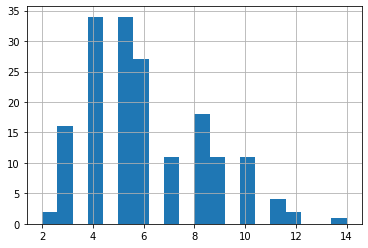

In [27]:
scribble_story_df['complexity'].hist(bins=20)

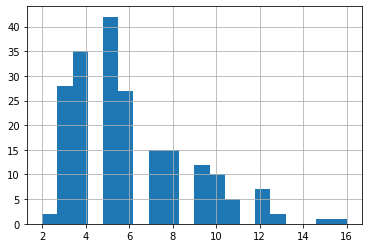

In [28]:
scribble_story_2_df['complexity'].hist(bins=20)

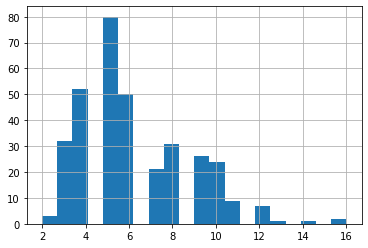

In [29]:
scribble_story_3_df['complexity'].hist(bins=20)

Counts of how many words fall into each complexity number.

In [30]:
scribble_story_df['complexity'].value_counts()

5     34
4     34
6     27
8     18
3     16
10    11
9     11
7     11
11     4
12     2
2      2
14     1
Name: complexity, dtype: int64

In [31]:
scribble_story_2_df['complexity'].value_counts()

5     42
4     35
3     28
6     27
8     15
7     15
9     12
10    10
12     7
11     5
13     2
2      2
16     1
15     1
Name: complexity, dtype: int64

In [32]:
scribble_story_3_df['complexity'].value_counts()

5     80
4     52
6     50
3     32
8     31
9     26
10    24
7     21
11     9
12     7
2      3
16     2
14     1
13     1
Name: complexity, dtype: int64

Word count for each story.

In [33]:
story_word_count(scribble_story)

333

In [34]:
story_word_count(scribble_story_2)

364

In [35]:
story_word_count(scribble_story_3)

699

# Testing Second Rewrite of Complexity Function

Testing the super words.

In [36]:
super_words = "aback, abaft, abalone, abamp, abampere, abase, abased, abash, abashed, abasia, abate, abatis, abaxial, abbacy, abbess, abbot, abduce, abduct, abducent, abductee, abductor, abele, abelmosk, abet, abettor, abeyance, abeyant, abhor, abject, abhorrent, abjure, abide, abiosis, abient, ablate, ablaze, abnegate, abode, abrade, abridge, abrogate, abrupt, abscind, absolve, absorb, abscond, abstain, abstruse, absurd, abyss, acarid, accede, acclivity, accolade, accord, accost, accosted, accredit, accroach, accrue, acumen, admonish, adumbrate, aggrandize, alacrity, anathema, annex, arboreal, arrogate, ascetic, bane, bashful, beguile, bilk, cajole, calumny, carouse, cavort, clamor, cleave, cobbler, cogent, conduit, congruity, connive, consign, contusion, contrite, covet, cupidity, crass, dearth, debacle, debauch, debunk, defunct, despot, didactic, dirge, discomfit, dispel, disrepute, dogmatic, dour, duplicity, edict, elegy, elicit, emend, emollient, enervate, enfranchise, ephemeral, equivocal, espouse, evince, exhort, execrable, exigent, expiate, expunge, extol, extant, expurgate, fallacious, fatuous, fetter, flagrant, foiled, foil, fortuitous, fractious, garrulous, gourmand, gratuitous, hapless, iconoclast, impinge, impute, inane, inchoate, inimical, inoculate, instigate, inure, invective, knell, licentious, linchpin, litigant, maelstrom, maudlin, maverick, mawkish, modicum, morass, mores, nadir, neophyte, noisome, obdurate, officious, ostracism, palliate, panacea, pariah, paucity, pejorative, pellucid, penurious, pert, pernicious, phlegmatic, pithy, platitude, plaudit, plenitude, portent, potentate, presage, probity, proclivity, profligate, proscribe, protean, prurient, puerile, quaint, quixotic, quandary, relegate, remiss, reprieve, reprobate, rife, sanguine, scurrilous, sobriety, solicitous, solipsism, staid, stolid, subjugate, surfeit, swarthy, tome, toady, torpid, travesty, trenchant, trite, truculent, turpitude, umbrage, upbraid, veracity, vestige, vilify, vitriolic, winsome, yoke, zephyr, wily, tirade, grommet, nauseant, addend, tutor, clout, sultry, fipple, accursed, accuser,  accustom, acedia, acerbic, acerbate, acerbity, acerose, acerous, acetic, acetous, achene, acicular, aciculate, aciniform, acme, acolyte, acquiesce, acquit, acrid, acrostic, acta, adage, addle, adduce, adit, adjoin, adjure, adulate, aegis, aerate, affix, aft, agog, airfoil, akin, alcove, alibi, allay, allude, alms, ambit, amble, amid, amity, amuck, ana, ancon, anent, animus, antic, aphid, apiary, appall, aptly, arete, argot, asp, atone, aura, avid, avow, awe, awry, balk, bask, bawl, bemoan, bequeath, berate, bide, biome, boor, brash, brawl, brute, bungle, butte, bygone, callow, captor, careen, cask, chaff, chard, chasm, chic, chide, chock, chortle, chroma, clad, coax, cohere, collude, comity, conjoin, conk, contort, contuse, coup, cower, cowl, coy, crag, curt, couth, cyborg, dactyl, daft, dais, dally, dap, decoct, decry, deft, deify, delude, dire, divvy, doff, doily, dote, drab, drawl, droll, duly, dupe, dyad, ebb, edify, effigy, eke, elate, elude, embroil, eon, ergo, espy, eve, exude, exult, feign, fickle, flak, flay, fleck, flub, flux, forgo, frill, furl, garish, gauche, ghee, gnash, gnaw, goad, gouge, gruff, guck, gyre, gyro, heed, heft, helm, hew, hex, hind, hoax, hovel, hubris, hue, husk, illude, imbue, inapt, ingot, iota, ire, irk, jeer, jibe, jinx, jive, jolt, jot, jowl, keen, kiln, knave, knoll, lank, laud, lave, lax, laze, leer, leery, lest, liquefy, lithe, loath, lob, lop, lug, lunge, lurk, lush, maim, malady, maraud, maw, meek, mewl, miff, moot, mope, morsel, mull, naught, nook, obtuse, ode, ombre, omit, opus, perplex, pilfer, placid, plait, pleat, poise, posy, pout, preen, primp, privy, prod, profuse, prone, pry, puny, putrid, pylon, pyre, qualm, quash, quell, quip, quirk, rancor, rapt, rasp, rebuff, recant, redact, reek, reel, reform, refract, reify, relent, rend, repute, resile, revile, riff, rile, romp, rout, ruse, sate, scant, schlep, scoff, scowl, sect, seep, seethe, shard, sheen, shirk, shunt, sidle, sigil, silt, sinew, singe, skew, skirr, skulk, slat, sleuth, slosh, sly, smelt, smirk, snafu, snare, sneer, snide, snub, sod, soiree, somber, sop, souse, spew, spiel, spire, splay, spry, squall, stasis, stern, ​​stifle, stint, stoke, stout, stow, strut, suave, subtle, sunder, supine, surly, swath, swathe, sync, tacit, tact, tatter, taut, teem, tepid, tether, thwart, toil, topple, tousle, trawl, trice, trifle, trill, trope, tuft, unapt, usury, valor, vapid, vat, verve, vex, vie, vigor, vivid, vouch, vying, waft, wane, wary, weary, welt, whim, whirl, wield, wile, wiry, woe, writhe, yowl, zeal"

In [37]:
super_words_dataframe = complexity_dataframe(super_words)

The newest complexity function returns the top 20 by default.

In [38]:
super_words_dataframe

,word,complexity
352,doily,20.0
237,acerbity,20.0
113,equivocal,20.0
111,enfranchise,20.0
243,acicular,20.0
244,aciculate,20.0
427,laze,20.0
522,skulk,20.0
247,acolyte,20.0
249,acquit,20.0


Testing the scribble sample stories.

In [39]:
scribble_story = "Once apon a time there was a girl named Mary. On a warm sunny day Mary was walking through the woods near hear nouse to look for some critters to take pictures of. She loved animals and nature all her life even though she was only nine years oldShe thinks that she is going to die soon. She does go to school but she isn't that smart. For example Mary recycled a pie even though the pie was not even bitten. Another thing she did was leave her muffin in the woods while she was traveling with  her family to Andrea's house which is one of Mary's friends atschool and Mary's muffin was eaten by a bear that sniffed it :q!:from far away. Yes. Mary could be a little weird but that is just how she is. Back to the real story now. Mary found a fox, took a picture she also found a rabbit took a picture she found a squirrel and took a picture before it ran away. But sooner or later she saw two eyes peeking through a bush on the side of the path she was walking on. Then the creature slowly came out of the bush. It was a bear. The bear growled at Mary. Mary was terrifyed. She started running and running but she could still see the bear growling behind her. This was the end of Mary. Mary was approaching her house she could see it now. She was safe in her house. She was now really scared. She could possibly be eaten but she made it to the door opened it and slammed it shut before the bear could get in. She ran or sprinted rather up to her room. Im alive!! She cried. I just cant belive it Im alive!! Mary was so relifed she told her mom and dad and her brother. And that night Mary was kissed goodnight and tucked into bed. And that is the only brave time of her life."
scribble_story_2 = " The secret fifth gradeI am Amelia I am starting fifth grade.I have a little siter named Emma, Emma isgoining into kindergarden, with her tripletsAva and Isabella, but I don't careabout them. When I was a 3rd graderwe learned how to invent. This year I will try to make an invention that a robot will go to school for me. Got to go to sleep. zzzzzz. I wake up get changed, brush teeth, and do hair. I have long curly brown hair. I used to wear glasses and braces, and oncebroke my leg. I am 10, I will turn 11 in November. The school is called Los Angeles elementry school. I live in Nevada and will drive there. It is probabaly an hour. When I walked in Mrs. Begula said Hello! Mrs. Klapeia, my last name. I said hi. I have to share a desk with Brittney. My schedule: Math Writting, reading, vocab, spelling, typing, and social studies. It had said NO Lunch In Fifth grade! When I was in second grade Kayla calle me a division Decimal. I did not like it. We had to make division problems and they were all with decimals. Class dismissed said Mrs. Begula. Now I was not a witch, vampire, or godess, but I made a sock from Emma and made it do my homework. When it was time to go I didn't I made a blue robot the whole night. Blue is my favorite color, but it only had a blue shirt because my teacher would notice it is not me. I sent it out with my mom. I went on my phone, until Ava came in my room. She said loudly Why are you not at school! Good thing she did not notice. I had to say something um I am sick. Cof cof cof. Oh I see let me tell Isabella. Isabella I heard she said. No said Ava. Should I tell Mom if she's really sick. Um no said Isabella play with me. Isabella already new about it. It the robot came back. It worked yay, and that is my year of fifth grade, When the home work is home. You are are doing my homework!"
scribble_story_3 = "Once apon a time there was a girl named Mary. On a warm Sunny day Mary was wealking through the woods near her house to look for some critters to take pictures of She loved animals and nature all her life even though she was only nine years old She thinks that she is going to die soon, she does go to school but she isnt that smart, for example Mary recycled a pie even though the pie was not even bitten. Another thing she did Was leave her muffin in the woods while she was traveling with her family to Andreas house which is one of Marys friends at school and Marys muffin was eaten by a bear that sniffer it from far away. Yes, Mary could be a little Weird but that is tust how she is. Back to the real story nowo Mary found a fox, took a picture she also found a rabbit took a picture She found a squirrel and took a picture before it ran away, But sooner or later she saw the eyes peeking through a bush on the site of the path she was walking on. Then the creature slowly came out of the bush. It was a bear. The bear grabled at Mary, Mary was terrifyed, she started running and running but she could still see the bear growling behind her. This was the and of Mary, Mary was approaching her have she could see it now, she was sate in her house, She was now really scared. She could possibly be eaten but she made it to the door opened it and slammed it shut before the bear could get in, she ran or sprinted rather up to her room. Im alive!!! she cried, I just cant belive it Im alive!!! Mary was so relifed she told her mom and dad and her brother. And that night Mary was kissed good night and thaked into bed. And that is the only brave time of her life. The secret fifth grade - 3102 E am Abeilia I am starting fifth grade I have alittle ster named Emma, Emma is goining into kindergarden, wi theer triplets Aver and Isabella, but I dont care about them when I was a 3rd grader leamed bow to invento This year I will try to make an invention that arobot Wil go to school forme. Got to go to deep. Ezzzzz. I wake up get changed, brush teeth, and do hair have long curly brown hair. I used to wear glasses and braces, and once broke my leg. I am 10, I will turn il in November The school is called Los Angeles elementry school, I live in Nevada and will drive there. It is probably an hour When I walked in Mrs. Begula said Hello Mrsklape, my last name I said his I have to share a desk with Brittney typing, and social stadies. It had said No My Schedule Math wetting reading, Vocabie spelling. Lunch In, Fifth grade When I was in second grade Kayla called me a division Decimal. I did not like it. we had to make division problems and they were all with iecimals Class dismissed said Mrs. Begular Now I was not a witch wampice, or godess, but I made asock from Emana and made it do my homework. When it was time to go 3102 I didnt I made a blue robet the whole night Blue is my favorite color but it only had a blue shirt because my teacher would hotice it is not me, I sent it out with Came in my room She said bond mayoneem. Prventions are phone on this Ava Why are you not at school. Good thing She did not notice. I had to say something un I am sick of of cof, oht see let me tell Isabella Isabella I heard she said. Mo suid Ava. Should I tell mom it shes really sick um no raid Isabella play with me. Isabella already new about it. It the robot came back It worker yay, and that is my year of fifth grade. When the home work is home you are doing my home werkt"

In [40]:
scribble_story_dataframe = complexity_dataframe(scribble_story)
scribble_story_2_dataframe = complexity_dataframe(scribble_story_2)
scribble_story_3_dataframe = complexity_dataframe(scribble_story_3)

In [41]:
scribble_story_dataframe

,word,complexity
130,approaching,14.0
121,terrifyed,12.0
66,traveling,12.0
134,possibly,11.0
159,goodnight,11.0
55,recycled,11.0
26,pictures,11.0
141,sprinted,10.0
59,another,10.0
115,creature,10.0


In [42]:
scribble_story_2_dataframe

,word,complexity
16,kindergarden,16.0
19,tripletsava,15.0
81,probabaly,13.0
75,elementry,13.0
65,oncebroke,12.0
24,careabout,12.0
40,invention,12.0
123,dismissed,12.0
165,something,12.0
14,isgoining,12.0


In [43]:
scribble_story_3_dataframe

,word,complexity
175,kindergarden,16.0
129,sate,16.0
126,approaching,14.0
225,elementry,13.0
297,something,12.0
267,dismissed,12.0
65,traveling,12.0
118,terrifyed,12.0
289,prventions,12.0
196,invention,12.0


Graph the distributions

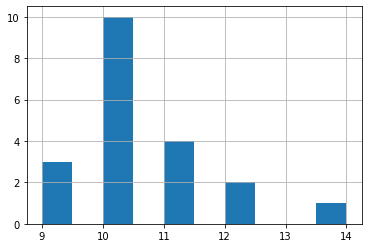

In [44]:
scribble_story_dataframe['complexity'].hist(bins=10)

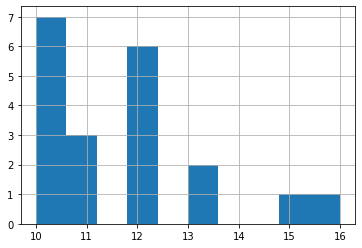

In [45]:
scribble_story_2_dataframe['complexity'].hist(bins=10)

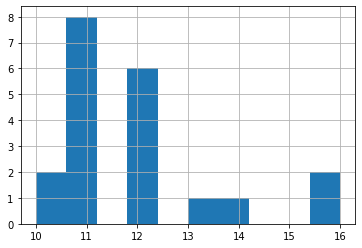

In [46]:
scribble_story_3_dataframe['complexity'].hist(bins=10)

Count the values in the complexity column

In [47]:
scribble_story_dataframe['complexity'].value_counts()

10.0    10
11.0     4
9.0      3
12.0     2
14.0     1
Name: complexity, dtype: int64

In [48]:
scribble_story_2_dataframe['complexity'].value_counts()

10.0    7
12.0    6
11.0    3
13.0    2
15.0    1
16.0    1
Name: complexity, dtype: int64

In [49]:
scribble_story_3_dataframe['complexity'].value_counts()

11.0    8
12.0    6
10.0    2
16.0    2
13.0    1
14.0    1
Name: complexity, dtype: int64

# The next two sections are for possible future improvement to the complexity function. 

# Morphemes

Morphemes are the letters added to a word that can be removed and the word still has meaning, like -er, -ing, -able, -ly.

Creating two complexity dfs to test out the morphemes function

In [50]:
scribble_story = "Once apon a time there was a girl named Mary. On a warm sunny day Mary was walking through the woods near hear nouse to look for some critters to take pictures of. She loved animals and nature all her life even though she was only nine years oldShe thinks that she is going to die soon. She does go to school but she isn't that smart. For example Mary recycled a pie even though the pie was not even bitten. Another thing she did was leave her muffin in the woods while she was traveling with  her family to Andrea's house which is one of Mary's friends atschool and Mary's muffin was eaten by a bear that sniffed it :q!:from far away. Yes. Mary could be a little weird but that is just how she is. Back to the real story now. Mary found a fox, took a picture she also found a rabbit took a picture she found a squirrel and took a picture before it ran away. But sooner or later she saw two eyes peeking through a bush on the side of the path she was walking on. Then the creature slowly came out of the bush. It was a bear. The bear growled at Mary. Mary was terrifyed. She started running and running but she could still see the bear growling behind her. This was the end of Mary. Mary was approaching her house she could see it now. She was safe in her house. She was now really scared. She could possibly be eaten but she made it to the door opened it and slammed it shut before the bear could get in. She ran or sprinted rather up to her room. Im alive!! She cried. I just cant belive it Im alive!! Mary was so relifed she told her mom and dad and her brother. And that night Mary was kissed goodnight and tucked into bed. And that is the only brave time of her life."
story_complexity = complexity_dataframe(scribble_story)

This is a story I randomly sampled from the internet to compare an adult written story.

In [51]:
random_online_story = "One is black. My therapist suggested this activity, which I think is a waste of time. I'm not really very artistic. Allie was. I was surprised by how well she could color, for her age, I mean. She didn't just scribble, she chose her colors carefully, she stayed in the lines, she even shaded, sometimes. She wasn't a savant but her pictures were better than other four-year-old kids'. Oh, how I loved her pictures. Making this picture of my own is neither creative nor productive, but I must admit it is oddly satisfying. And it gives me something to do in church, when I don’t want to talk to the people sitting next to me. I look like I’m focused, and they leave me alone, and when I hear someone in class share a myopic story about how they prayed and God helped them find their car keys, I just search for another One and keep my head down. Color in the circle, or the rectangle, or the triangle. Find the next segment. Try not to think about a loving, all-seeing, all-knowing God who would descend from His throne divine to help someone find their car keys, but allow my preschooler to suffer and die from an incurable childhood cancer. One is black. It outlines everything. I do One first. I think of her at the strangest moments. Like when I’m filling a bag of oatmeal from the bulk bin dispenser, and I remember her at age two, slipping away from me at Kroger and making her way to that same aisle which must have looked like a free candy dispensary. When I found her, she was full of chocolate covered raisins and peach rings. I was full of embarrassment and confusion over the predicament, so I just hoisted her atop my pregnant belly, handed a confused cashier a twenty and left. The memory is so real and vivid that I turn to the shopping cart to retell it to her, and I remember she’s gone. There’s just the one sister now, a lone mitten without a mate, sitting in the cart, staring toward the school supplies and nibbling a thumbnail nervously. I don’t tell her the story. We don’t talk about Allie much. Even though my therapist says we should. Two is brown. It brings to life the little doe, sitting in the forest, only it leaves behind the white spots and underbelly. Two is the dirt beneath the grass. Two are the trees. Kendra is at the dentist. She’s gotten four fillings in the past month, but one of them just won’t stay in. Dentist said something about tight contacts, small mouth, I don’t know, all I know is a few hours after she gets home the thing has popped right out again. I made Darrin take her. I can’t go to the dentist anymore. I can’t stand to see the scrubs and the implements. No amount of color-by-number can soothe that anxiety. Meanwhile, I'm staring at the dining room table, hoping a fully prepared meal might miraculously appear there. Two years ago, it seemed this table was, indeed, a purveyor of magically prepared meals. It was covered with homemade bread, cookies, and, mostly c,asseroles. My mother-in-law stacked those in the fridge and put whatever was closest at hand into the oven at 350 degrees. I put it on my fork and into my mouth mechanically, without tasting, because you still have to do mundane things, like feed yourself. You still have to do them, even when your child is dead. You still have to feed yourself and your family years later, too. But the table isn't magic anymore. Three is green. Grass and leaves. I cry when I begin three, seeing the grass shoots come up from the dirt. I never knew grass could hurt, but it does, when you realize that time has passed, and grass is growing over your daughter’s grave, even though it feels like just yesterday that it was a fresh mound. Wasn't it just last week she was healthy, three-and-a-half, zooming down a twirly slide? Wasn't it just last month that she held her new baby sister on her lap, pointing out the tiny facial features with a chubby finger? Except it wasn't. That new baby is about to start preschool. In three days Kendra will be as old as Allie was when she died. And I’m terrified of what that means. Four is pink. Delicate pink flowers. Just starting to bloom. What happens when your youngest child grows older than your oldest child? There’s no answer in a parenting book for that question. It isn’t supposed to happen. We held space for Allie, but now I worry, somehow the space is gone. Like the white in my picture, which is rapidly disappearing. People assume, without asking, that Kendra is an only child. My mom has stopped saying Allie's name, for some reason. She's just...disappearing, and I wonder whether she left a trace in the world. But inside of me there's still a grave, six feet deep, and it will never be filled in. Kendra starts preschool today. She’s nervous, but I know she’ll do great. She needs to be with other kids her age, it will be good for her. Five is orange. It highlights the undersides of the leaves. Orange tulips. I sit on the floor in the girls’ room, coloring, imagining that Kendra is probably coloring too. I am obsolete, an adult who spends her hours shading in shapes, following a prescribed pattern to make mass-produced art. I am a thirty-year-old empty nester, a geriatric. Only that can’t be true, because I have a four-year-old. Two of them, actually. My therapist says I should think about getting a job. I want to tell her I have my hands full, but that would be a lie. I wish I had my hands full. Instead, I spend my precious alone hours wishing I wasn’t alone. I color. I long to be needed, even if that need is to hold my baby girl’s hair while she vomits bile, again and again. To stay awake, all night, because she can only fall asleep sitting on my lap. To watch her breathing get slower and slower because I was the one who pushed her into this world, and I needed to be the one to hold her hand when she was pulled out. Six is yellow. The last color. It’s mostly sunshine. It was sunny, the day we buried Allie. The preacher said some bullshit about it being Allie smiling down on us, but I couldn’t believe it. It just felt cruel, that good weather still existed. That the sun could shine down and warm me, but its warmth would never again reach her, because she was too far underground to feel it. She was cold. She would always be cold. But, and I know it’s really trite to say this, the sun kept coming up. The Earth kept spinning even though my beautiful, artistic, vivacious daughter was no longer on it. And the sun keeps coming up, and coming up, and soon I will have lived more revolutions on Earth since she left than I did while she was here, and entertaining that thought is like touching a hot stove and I can’t do it. I don’t want to finish. I want to leave these white spaces, glaringly obvious to show that we aren’t complete without her. That we never will be. So, I leave the Six blank."
random_df = complexity_df(random_online_story)

In [52]:
def morphemes(df_column): #story_complexity['word']
  # Turn the column into a list
  word_list = df_column.str.lower().tolist()
  # List of common words that have what seem to be morphemes, but are not
  commons = ['another', 'family', 'brother', 'mother', 'father', 'rather', 'cancer', 'really', 'better', '']
  count = 0
  list_o_words = []
  for word in word_list:
    # Check each word to see if it ends in -er, -ing, -able, or -ly
    if word.endswith('er') or word.endswith('ing') or word.endswith('able') or word.endswith('ly'):
      # Filter out words that are 5 letters or less
      if len(word) > 5 and not word in commons:
        count += 1
        list_o_words.append(word)
      else:
        continue
  # Return the count of how many morphemes were found and the list of those words
  return count, list_o_words

In [53]:
morphemes(story_complexity['word'])

(5, ['approaching', 'traveling', 'possibly', 'growling', 'peeking'])

This story helped me find common words that children might also use.

In [54]:
morphemes(random_df['word'])

(0, [])

Counting the values in the complexity column and sorting by the complexity score.

In [55]:
story_complexity['complexity'].value_counts().sort_index(ascending=False)

14.0     1
12.0     2
11.0     4
10.0    10
9.0      3
Name: complexity, dtype: int64

In [56]:
random_df['complexity'].value_counts().sort_index(ascending=False)

2    56
Name: complexity, dtype: int64

In [57]:
story_complexity

,word,complexity
130,approaching,14.0
121,terrifyed,12.0
66,traveling,12.0
134,possibly,11.0
159,goodnight,11.0
55,recycled,11.0
26,pictures,11.0
141,sprinted,10.0
59,another,10.0
115,creature,10.0


In [58]:
random_df

,word,count,len,syllables,complexity
0,O,7,1,1,2
1,n,348,1,1,2
2,e,624,1,1,2
3,,1254,1,1,2
4,i,337,1,1,2
5,s,361,1,1,2
6,b,86,1,1,2
7,l,259,1,1,2
8,a,398,1,1,2
9,c,116,1,1,2


# NLTK Parts of Speech

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Tags each word in the story with their respective parts of speech. I was concidering removing proper nouns.

In [60]:
stop_words = set(stopwords.words('english'))

tokenized = sent_tokenize(scribble_story)
for i in tokenized:
      
    # Word tokenizers is used to find the words 
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
  
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words] 
  
    #  Using a Tagger. Which is part-of-speech 
    # tagger or POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
  
    print(tagged)

[('Once', 'RB'), ('apon', 'JJ'), ('time', 'NN'), ('girl', 'NN'), ('named', 'VBN'), ('Mary', 'NNP'), ('.', '.')]
[('On', 'IN'), ('warm', 'JJ'), ('sunny', 'JJ'), ('day', 'NN'), ('Mary', 'NNP'), ('walking', 'VBG'), ('woods', 'NNS'), ('near', 'IN'), ('hear', 'JJ'), ('nouse', 'IN'), ('look', 'NN'), ('critters', 'NNS'), ('take', 'VBP'), ('pictures', 'NNS'), ('.', '.')]
[('She', 'PRP'), ('loved', 'VBD'), ('animals', 'NNS'), ('nature', 'JJ'), ('life', 'NN'), ('even', 'RB'), ('though', 'IN'), ('nine', 'CD'), ('years', 'NNS'), ('oldShe', 'JJ'), ('thinks', 'VBZ'), ('going', 'VBG'), ('die', 'JJ'), ('soon', 'RB'), ('.', '.')]
[('She', 'PRP'), ('go', 'VBP'), ('school', 'NN'), ("n't", 'RB'), ('smart', 'VB'), ('.', '.')]
[('For', 'IN'), ('example', 'NN'), ('Mary', 'NNP'), ('recycled', 'VBD'), ('pie', 'RB'), ('even', 'RB'), ('though', 'IN'), ('pie', 'NNS'), ('even', 'RB'), ('bitten', 'VBP'), ('.', '.')]
[('Another', 'DT'), ('thing', 'NN'), ('leave', 'VBP'), ('muffin', 'VBN'), ('woods', 'NNS'), ('travel

NLTK POS tag list: 

---



*   CC - coordinating conjunction
*   CD - cardinal digit
*   DT - determiner
*   EX - existential there ("there is", "there exists")
*   FW - foreign word
*   IN - preposition/subordinating conjunction
*   JJ - adjective 'big'
*   JJR - adjective, comparative 'bigger'
*   JJS - adjective, superlative 'biggest'
*   LS - list marker
*   MD - modal could, will
*   NN - noun, singular 'desk'
*   NNS - noun plural 'desks'
*   NNP - proper noun, singular 'Harrison'
*   NNPS - proper noun, plural 'Americans'
*   PDT - predeterminer 'all the kids'
*   POS - possessive ending parent's
*   PRP - personal pronoun I, he, she
*   PRP$ - possessive pronoun my, his, hers

*   RB - adverb very, silently
*   RBR - adverb, comparative better
*   RBS - adverb, superlative best
*   RP - particle give up
*   TO - to go 'to' the store
*   UH - interjection errrrrrrrm
*   VB - verb, base form take
*   VBD - verb, past tense: took
*   VBG - verb, gerund/present participle: taking
*   VBN - verb, past participle: taken
*   VBP - verb, sing. present, non-3d: take
*   VBZ - verb, 3rd person sing. present: takes
*   WDT - wh-determiner which
*   WP - wh-pronoun who, what
*   WP$ - possessive wh-pronoun whose
*   WRB - wh-abverb where, when


